In [2]:

import torch
from time import time
from DocBuilder.utils import split_list_to_batch, restore_batched_list, unbind_sparse, top_k_sparse, tensor_retuen_type
from DocBuilder.Retriever_k_means import cluster_builder
import matplotlib.pyplot as plt
import numpy as np

In [3]:

with open("reward_number_0.log", "r") as f:
    r = f.readlines()
r = [float(i) for i in r][:]
print(len(r))
moving_avg = []
ma = np.mean(r[:150])
ratio=1-10/len(r)
for x in r:
    ma = ratio * ma + (1-ratio) * x
    moving_avg.append(ma)

plt.ylabel("Reward")
plt.xlabel("Training steps")
plt.plot(moving_avg)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'reward_number_0.log'

tensor(0.0065)


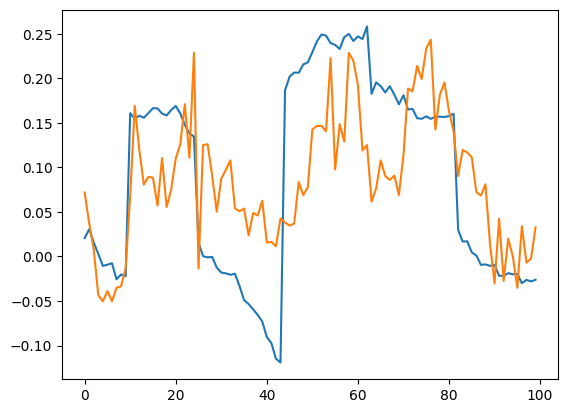

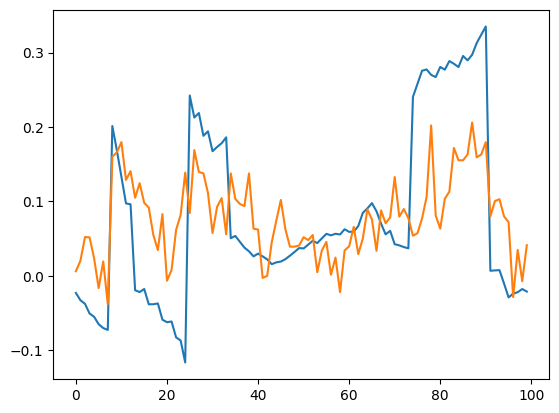

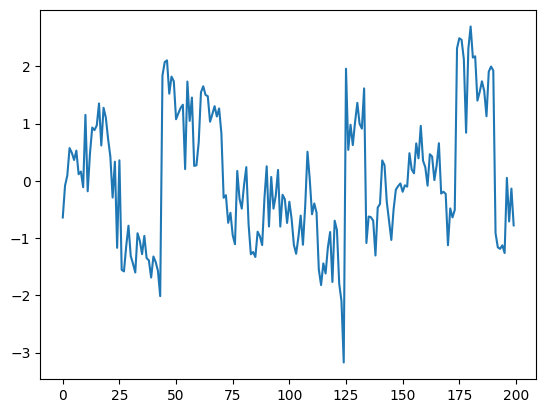

In [ ]:
returns = torch.load("save/return.pt")
value = torch.load("save/value.pt")
print((returns - value).square().mean())
plt.plot(returns[:100])
plt.plot(value[:100])
plt.show()
plt.plot(returns[100:200])
plt.plot(value[100:200])
plt.show()
adv = returns - value
plt.plot(((adv-adv.mean())/adv.std())[:200])
plt.show()

In [ ]:
import json


with open(f'data/smart_factory.jsonl','r') as f:
    
    documents=json.load(f)

file = open("data/smart_train.jsonl", "w")
with open("data/unique_smart_factory_qapairs.jsonl", "r") as f:
    short = 0
    long = 0
    for line in f:
        line = json.loads(line)
        if len(line["Answer"])<50:
            sa, la = line["Answer"], None
            short+=1
        else:
            sa, la = None, line["Answer"]
            long+=1
        json.dump(dict(question=line["Question"], short_answers=sa, long_answer=la, file = line["File_name"].split("/")[-1], label_document = line["Document"], confidence = line["Confidence"]), file)
        file.write('\n')

print(short, long)

11860 37745


In [1]:
from LM.Knowledge_encoder import KnowEncoder_Embedding
from LM.llama_reader import LLaMa_reader
import config
LM = LLaMa_reader(config.LM_dir, 'cpu')
LM.device
f = KnowEncoder_Embedding(32, 4096, 32, LM.model.get_input_embeddings())
f.device
f.forward(["hello", "world"]*3, 2)[0].shape


/root/miniconda3/envs/RR/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading checkpoint shards: 100%|██████████| 3/3 [00:00<00:00,  8.27it/s]
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


torch.Size([3, 64, 4096])

In [2]:
import torch
for k,v in torch.load("save/NQ_EncLM_1.pt").items():
    if "adaption" in k:
        print(k, "\n",v) 

model.model.model.layers.0.self_attn.adaption_gate 
 Parameter containing:
tensor([1.3383], device='cuda:0', requires_grad=True)
model.model.model.layers.1.self_attn.adaption_gate 
 Parameter containing:
tensor([0.0269], device='cuda:0', requires_grad=True)
model.model.model.layers.2.self_attn.adaption_gate 
 Parameter containing:
tensor([0.0134], device='cuda:0', requires_grad=True)
model.model.model.layers.3.self_attn.adaption_gate 
 Parameter containing:
tensor([-0.0449], device='cuda:0', requires_grad=True)
model.model.model.layers.4.self_attn.adaption_gate 
 Parameter containing:
tensor([0.0379], device='cuda:0', requires_grad=True)
model.model.model.layers.5.self_attn.adaption_gate 
 Parameter containing:
tensor([0.0467], device='cuda:0', requires_grad=True)
model.model.model.layers.6.self_attn.adaption_gate 
 Parameter containing:
tensor([0.0726], device='cuda:0', requires_grad=True)
model.model.model.layers.7.self_attn.adaption_gate 
 Parameter containing:
tensor([-0.0862], dev

In [14]:
from transformers import AutoTokenizer
import config
t = AutoTokenizer.from_pretrained(config.LM_dir)

a = t.apply_chat_template([{"role": "system", "content": f"<knowledge>  </knowledge> Please provide a answer based on knowledge"},{"role":"user","content":"What are the crucial activities that must be performed prior to the implementation of digital transformation in a manufacturing SME?"}, {"role":"assistant","content":"Development activities and system design activities are crucial prior to implementation. SMEs can also capitalize on the RandD tax credits relief from the government since such projects encourage economic growth."}])
print(len(a))

102
